In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
df = pd.read_csv('Position_Salaries.csv')
df


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


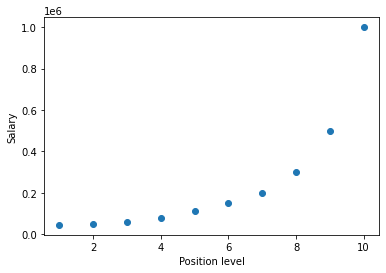

In [14]:
x = df.iloc[:, 1].values
y = df.iloc[:, 2].values

plt.scatter(X, y)
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

In [15]:
""" Es una buena practica pero no hay suficientes datos

# Con sklearn 

from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

"""

' Es una buena practica pero no hay suficientes datos\n\n# Con sklearn \n\nfrom sklearn.model_selection import train_test_split\n\nX_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)\n\n'

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


R-cuadrado para grado 1: 0.6690412331929895
Validación cruzada (R-cuadrado) para grado 1: [-1.49490612e+04 -1.38779176e+01 -5.58394243e+01 -2.00261671e+01
 -3.20931250e+00]
Media R-cuadrado: -3008.4028091967475


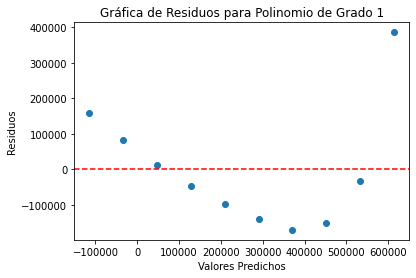

R-cuadrado para grado 2: 0.9162082221443943
Validación cruzada (R-cuadrado) para grado 2: [-1.55609093e+04 -8.71901377e+01 -1.04525653e+01 -6.07342501e+00
 -1.36362847e+00]
Media R-cuadrado: -3133.197810695418


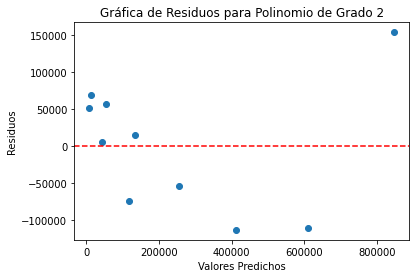

R-cuadrado para grado 3: 0.9812097727913366
Validación cruzada (R-cuadrado) para grado 3: [-2.10275760e+04 -3.22743007e+01 -9.62603555e+00  7.38053606e-01
 -5.86672222e-01]
Media R-cuadrado: -4213.864983725759


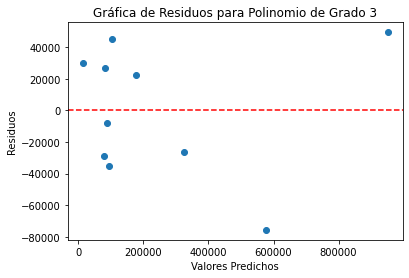

R-cuadrado para grado 4: 0.9973922891706614
Validación cruzada (R-cuadrado) para grado 4: [-1.72610454e+04 -2.64244015e+00  6.26719353e-01  4.65649877e-01
  2.13704861e-01]
Media R-cuadrado: -3452.4763435667774


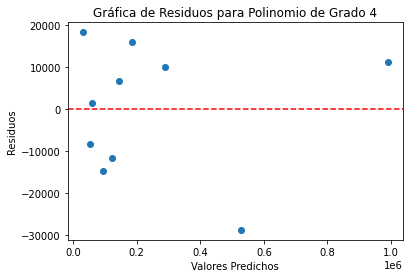

In [20]:
# Definir grados de polinomio a evaluar
degrees = [1, 2, 3, 4]

for degree in degrees:
    # Transformar datos para el grado actual del polinomio
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    
    # Ajustar modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predecir y calcular R-cuadrado
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    print(f"R-cuadrado para grado {degree}:", r2)
    
    # Realizar validación cruzada
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='r2')
    print(f"Validación cruzada (R-cuadrado) para grado {degree}:", scores)
    print("Media R-cuadrado:", np.mean(scores))
    
    # Analizar residuos
    residuos = y - y_pred
    plt.figure()
    plt.scatter(y_pred, residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Gráfica de Residuos para Polinomio de Grado {degree}')
    plt.xlabel('Valores Predichos')
    plt.ylabel('Residuos')
    plt.show()

   Grado del Polinomio       R^2
0                    1  0.955682
1                    2  0.995455
2                    3  1.000000
3                    4  1.000000


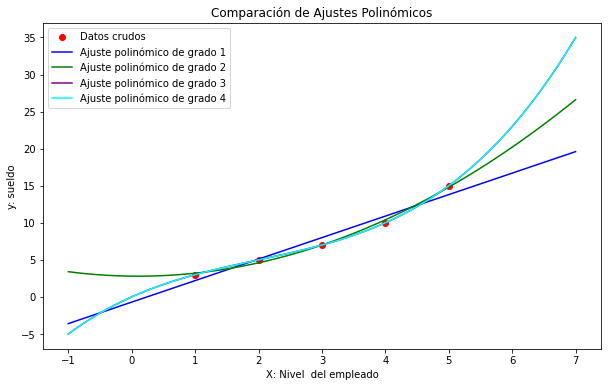

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 7, 10, 15])

# Definir grados de polinomio a evaluar
degrees = [1, 2, 3, 4]

# Diccionario para almacenar los resultados de R^2
r2_results = {}

# Preparar datos para la gráfica
x_min, x_max = x.min(), x.max()
x_range = x_max - x_min
x_new = np.linspace(x_min - 0.5 * x_range, x_max + 0.5 * x_range, 200).reshape(-1, 1)

# Ajustar modelos y calcular R^2 para cada grado
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    r2_results[degree] = r2  # Almacenar R^2 en el diccionario

# Crear DataFrame para mostrar los resultados en una tabla
r2_df = pd.DataFrame(list(r2_results.items()), columns=['Grado del Polinomio', 'R^2'])
print(r2_df)

# Gráfica de ajustes
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Datos crudos')
colors = ['blue', 'green', 'purple', 'cyan']
for i, degree in enumerate(degrees):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(poly_features.transform(x_new))
    plt.plot(x_new, y_pred, label=f'Ajuste polinómico de grado {degree}', color=colors[i])

plt.xlabel('X: Nivel  del empleado')
plt.ylabel('y: sueldo')
plt.title('Comparación de Ajustes Polinómicos')
plt.legend()
plt.show()
